<a href="https://www.kaggle.com/code/yunusemreakca/car-price-eda-predictionml?scriptVersionId=226627046" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Car Price EDA & PredictionML

This project was developed by a team specializing in data science and machine learning. Our goal is to optimize data analysis and modeling processes to provide meaningful insights.

 Yunus Emre Akca <br>
LinkedIn: https://www.linkedin.com/in/yunus-emre-akca-900a61268/ <br>
GitHub: https://github.com/yunus-emr


Celal Üngür<br>
LinkedIn: https://www.linkedin.com/in/celal-%C3%BCng%C3%BCr-412a40301/<br>
GitHub: https://github.com/ungurcelal

##  Preface  

In the modern automotive market, determining the fair price of a vehicle is crucial for both buyers and sellers. Various factors, such as brand, model, engine size, mileage, and ownership history, significantly impact a car’s price. This project aims to build a **predictive model for car prices** by analyzing relevant features and applying machine learning techniques.  

To achieve this goal, we will **process the dataset efficiently**, explore key insights through **Exploratory Data Analysis (EDA)**, and implement appropriate **data preprocessing techniques** to ensure a clean and structured dataset. Once prepared, we will utilize **machine learning algorithms** to develop a robust price prediction model.  

This project will provide valuable insights into the factors influencing car prices and serve as a useful tool for price estimation in the automotive industry.  

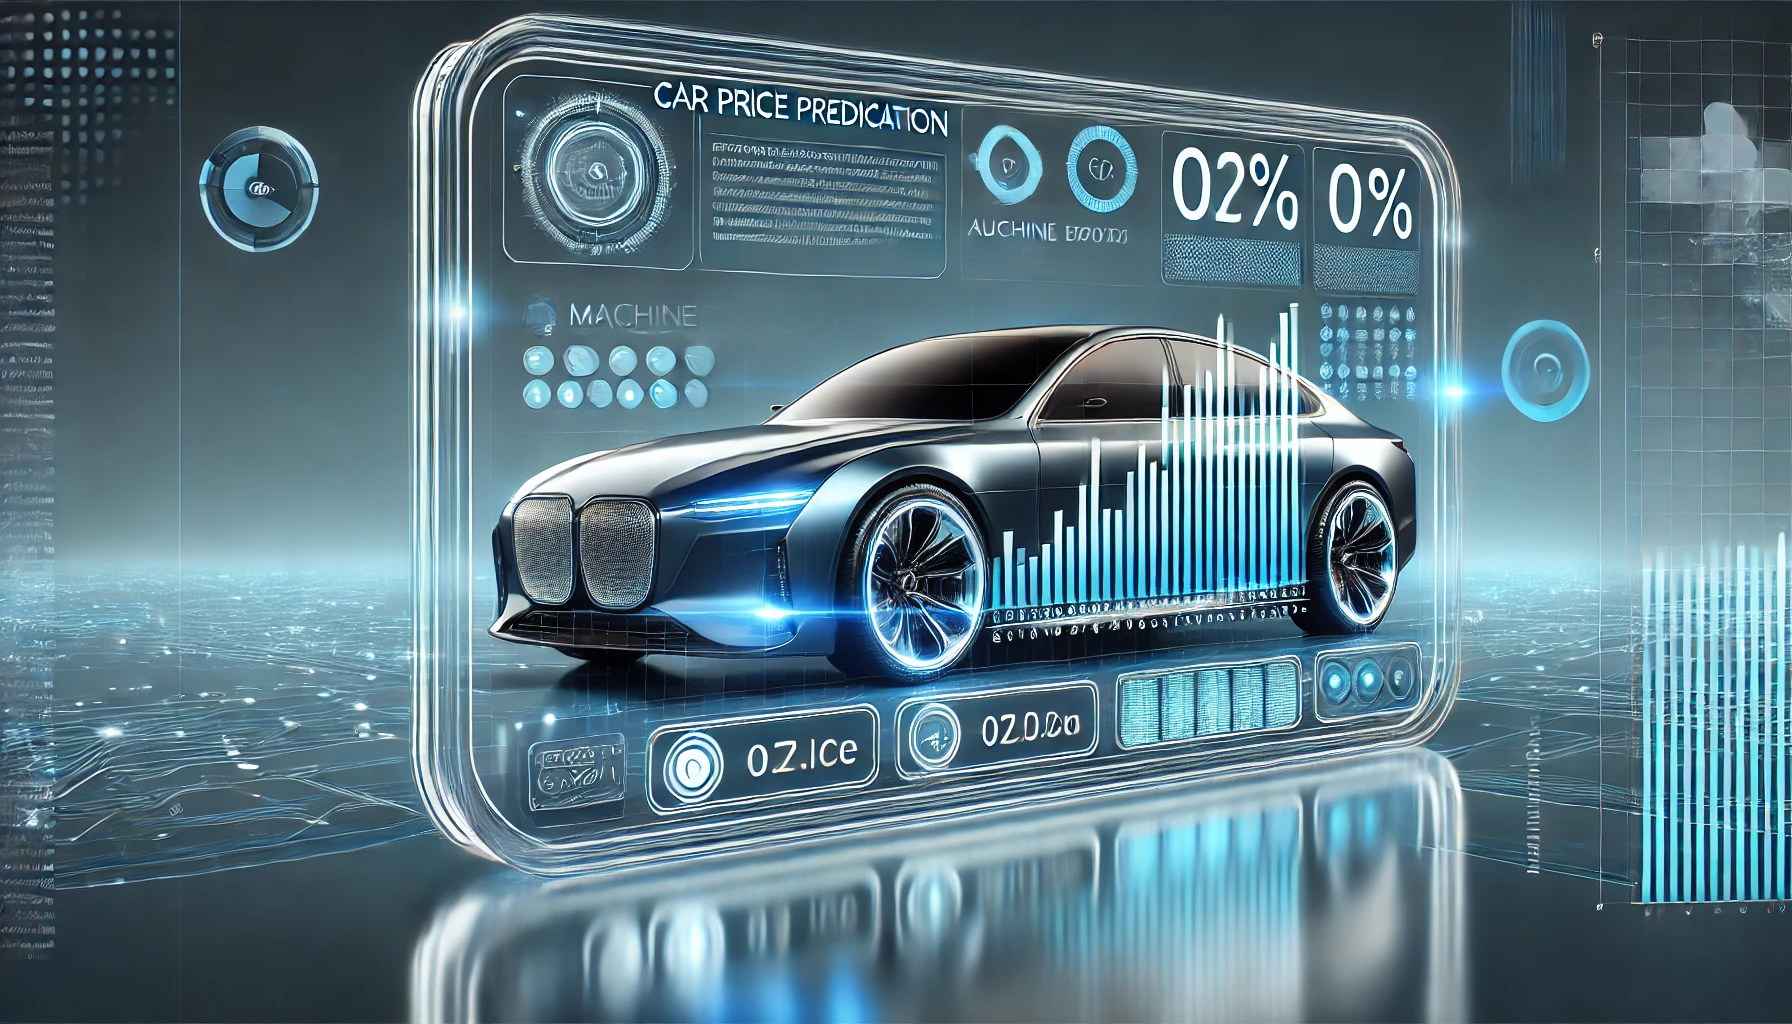


<a id = '1'></a>

## Dataset Feature Explanations

* **Brand (Manufacturer):**
Represents the manufacturer of the vehicle. (e.g., BMW, Mercedes, Toyota)

* **Model (Model Name):**
Specifies the model of the vehicle within a brand. (e.g., Corolla, 3 Series, C-Class)

* **Year (Production Year):**
Indicates the year the vehicle was manufactured.

* **Engine_Size (Engine Capacity - in Liters):**
Represents the engine displacement size. (e.g., 1.6L, 2.0L, 3.5L)

* **Fuel_Type (Fuel Type):**
Indicates the type of fuel used by the vehicle. (e.g., Petrol, Diesel, Hybrid, Electric)

* **Transmission (Gear Type):**
Specifies the transmission system of the vehicle. (e.g., Manual, Automatic)

* **Mileage (Odometer Reading - Usage Amount):**
Shows the total distance the vehicle has traveled so far.

* **Doors (Number of Doors):**
Represents the number of doors on the vehicle. (e.g., 2, 4, 5)

* **Owner_Count (Number of Previous Owners):**
Indicates how many people have previously owned the vehicle.

* **Price (Selling Price - Dependent Variable):**
Represents the vehicle’s selling price.
Objective: The goal is to predict vehicle prices based on the other variables in the dataset. ($)

## Analysis Content
1. [Dataset Feature Explanations](#1)
2. [Python Libraries](#2)
3. [Importing](#3)
4. [Missing Data & Outlier Detection](#4)
5. [Data Analysis](#5)
6. [Statistical](#6)
7. [Variable Conversion](#7)
8. [Machine Learning](#8)

<a id = '2'></a> 
## Python Libraries

In [1]:

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from warnings import filterwarnings
filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-price-dataset/car_price_dataset.csv


<a id = "3"></a>
## Importing 

In [2]:
carPrice = pd.read_csv("/kaggle/input/car-price-dataset/car_price_dataset.csv")
df = carPrice.copy()

In [3]:
df.head(10)

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867
5,Toyota,Camry,2007,2.7,Petrol,Automatic,157889,4,4,7242
6,Honda,Civic,2010,3.4,Electric,Automatic,139584,3,1,11208
7,Kia,Sportage,2001,4.7,Electric,Semi-Automatic,157495,2,2,7950
8,Kia,Sportage,2014,2.6,Hybrid,Manual,98700,3,4,9926
9,Toyota,RAV4,2005,3.1,Petrol,Manual,107724,2,5,6545


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,10000.0,2011.54370,6.897699,2000.0,2006.00,2012.0,2017.0,2023.0
Engine_Size,10000.0,3.00056,1.149324,1.0,2.00,3.0,4.0,5.0
Mileage,10000.0,149239.11180,86322.348957,25.0,74649.25,149587.0,223577.5,299947.0
Doors,10000.0,3.49710,1.110097,2.0,3.00,3.0,4.0,5.0
Owner_Count,10000.0,2.99110,1.422682,1.0,2.00,3.0,4.0,5.0
Price,10000.0,8852.96440,3112.596810,2000.0,6646.00,8858.5,11086.5,18301.0


In [5]:
df.shape

(10000, 10)

In [6]:
df["Brand"].value_counts()

Brand
Ford          1048
Audi          1038
Volkswagen    1020
Honda         1009
Chevrolet     1003
BMW            999
Hyundai        995
Kia            976
Toyota         970
Mercedes       942
Name: count, dtype: int64

<a id = '4'></a>
## Missing Data & Outlier Detection

In [7]:
df.isnull().sum()

Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64

* There is no missing data in our data set

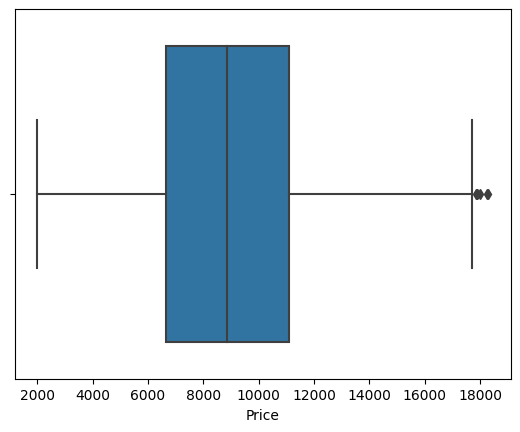

In [8]:
sns.boxplot(data = df, x = "Price");

* Before deciding how to handle outliers in the Price variable, we first need to select a machine learning model. Depending on the model’s sensitivity to outliers, we will apply different methods to address them accordingly.

<a id = "5"></a>
## Data Analysis

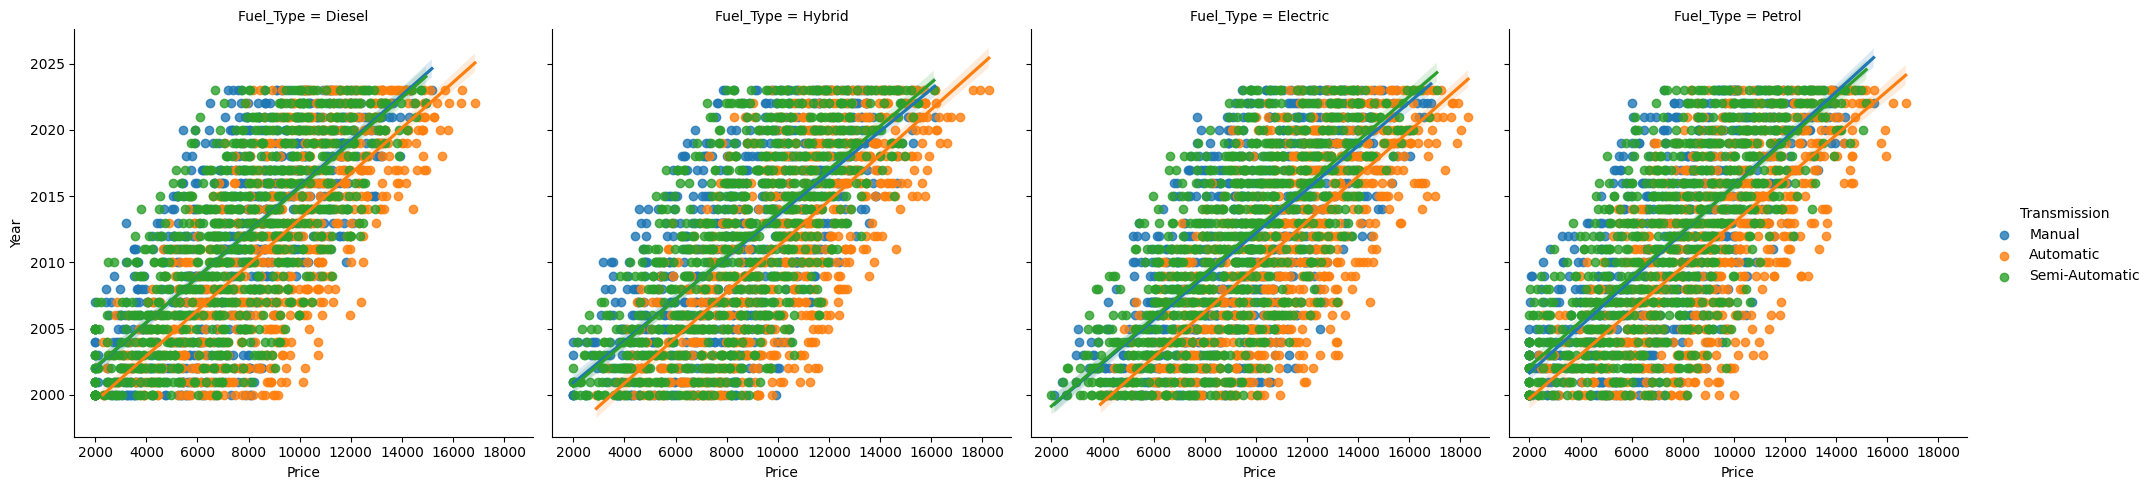

In [9]:
sns.lmplot(x = "Price",y = "Year",hue = "Transmission",col = "Fuel_Type",data = df);

**Regression Lines** <br>
* In the graph, there is a regression line for each fuel type, and these lines generally follow a straight direction.
This indicates a linear trend between Price and Year.

**Distribution of Data Points** <br>

* In the scatter plots, the points are concentrated around a clear trend line.
If the relationship were not linear, the points would be more scattered or form a curved shape around the line.

**Similar Trends Across Different Categories**<br>

* In all fuel types (Diesel, Hybrid, Electric, Petrol), the price appears to increase with the year.
This suggests a consistent trend between Price and Year, making it suitable for linear modeling.

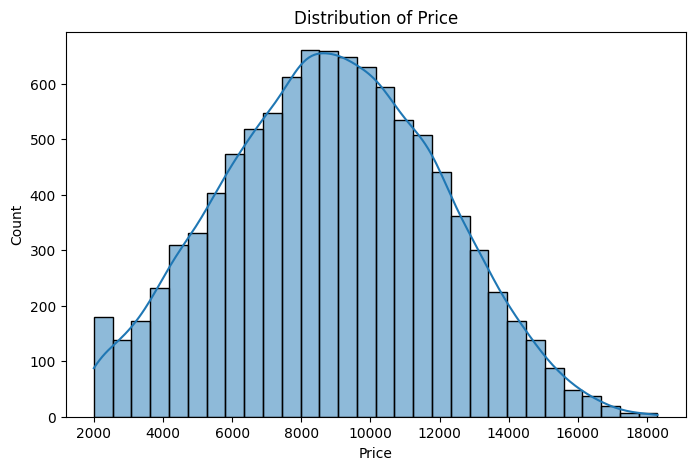

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(df["Price"], bins=30, kde=True)
plt.title("Distribution of Price")
plt.show()

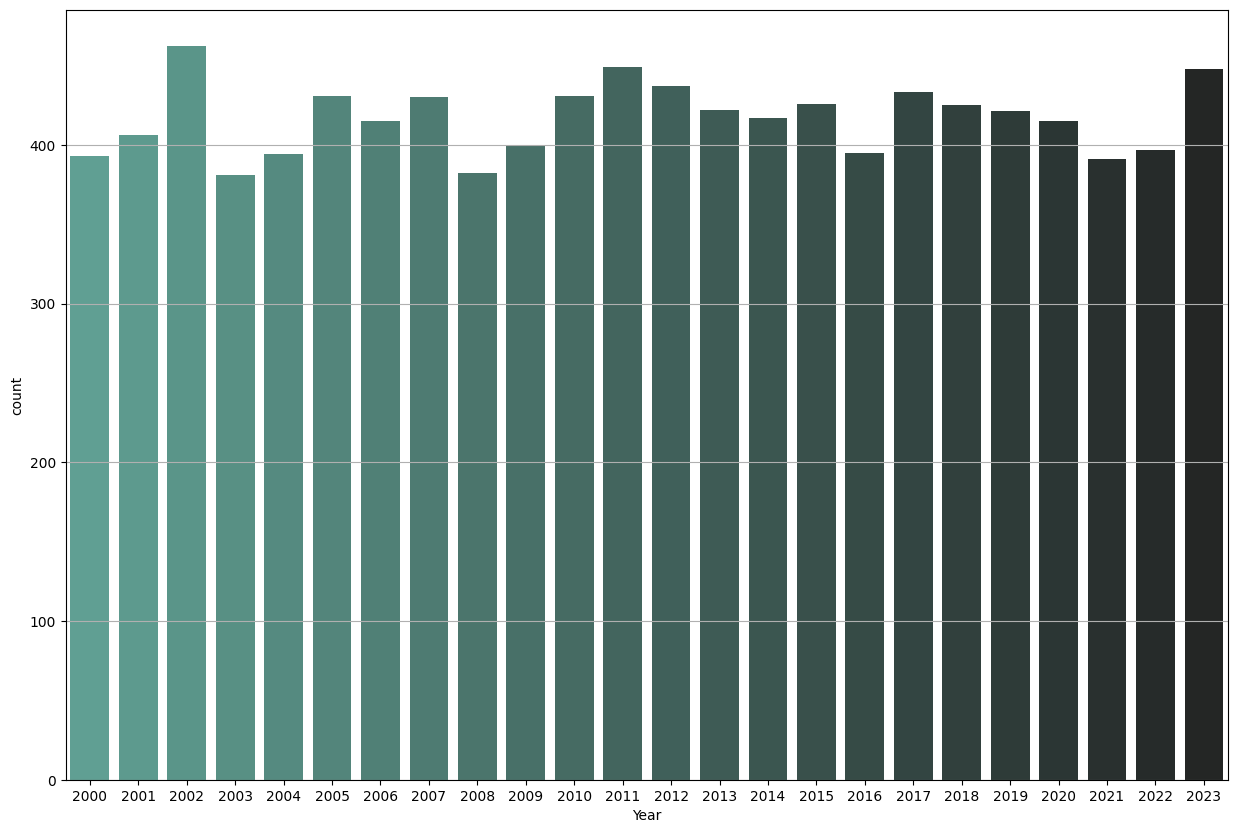

In [11]:
plt.figure(figsize = (15,10))
sns.countplot(x = "Year",data = df, palette = 'dark:#5A9_r')
plt.grid(axis = 'y')
plt.title("")
plt.show()

In [12]:
brand_counts = df["Brand"].value_counts()

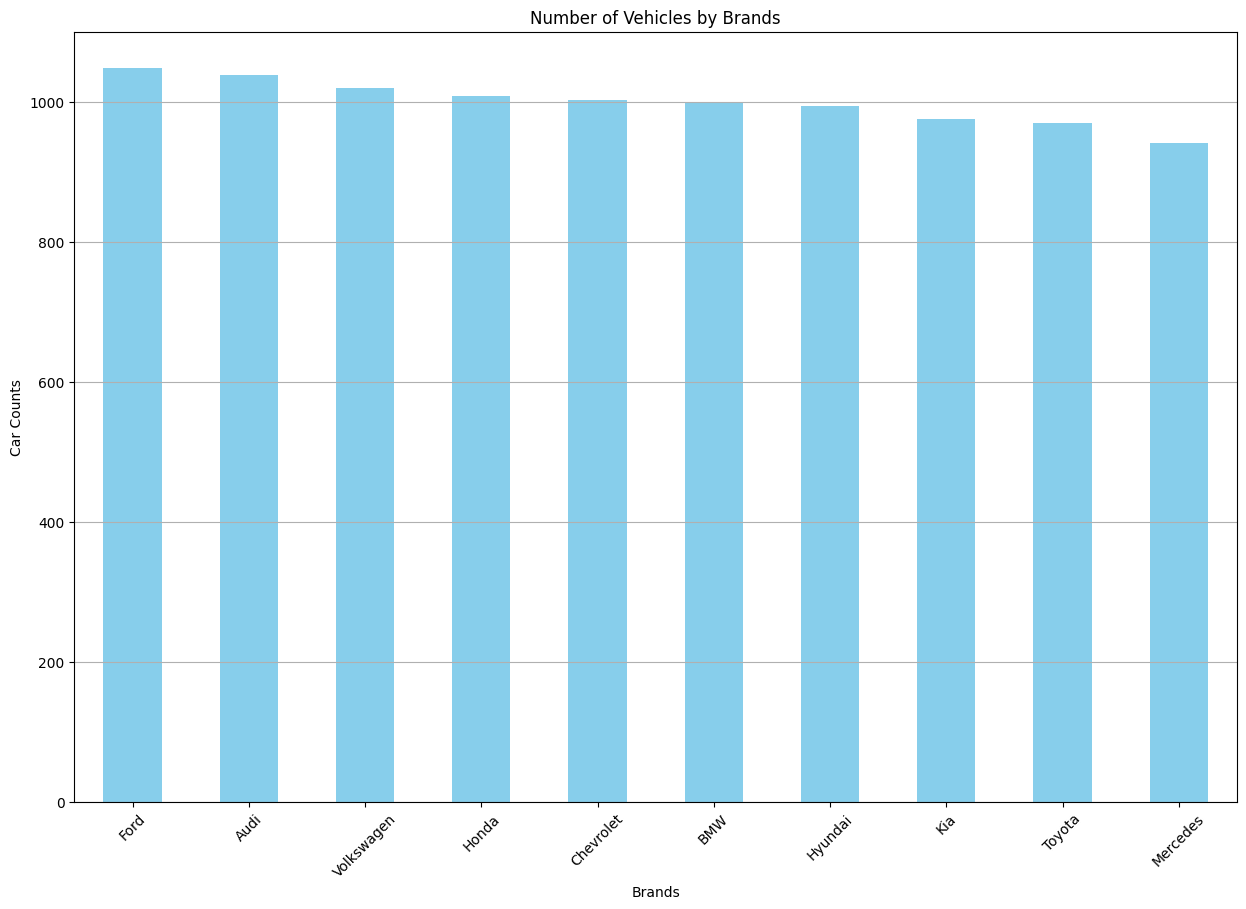

In [13]:
plt.figure(figsize =(15,10))
brand_counts.plot(kind = 'bar', color="skyblue")
plt.title("Number of Vehicles by Brands")
plt.xlabel("Brands")
plt.ylabel("Car Counts")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [14]:
highest_cars = df[df.loc[:,"Price"] >16999]
highest_cars = highest_cars.sort_values(by ="Price",ascending = False)

lowest_cars = df[df.loc[:,"Price"] < 2001]
lowest_cars = lowest_cars.sort_values(by ="Price",ascending = False)

In [15]:
lowest_cars

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
232,BMW,X5,2002,2.9,Petrol,Manual,296864,4,2,2000
6470,Mercedes,GLA,2000,2.5,Diesel,Semi-Automatic,258029,4,3,2000
7325,Audi,Q5,2006,1.3,Petrol,Semi-Automatic,296079,4,4,2000
7198,Chevrolet,Impala,2004,1.4,Petrol,Manual,280128,4,2,2000
7164,Ford,Focus,2003,1.3,Hybrid,Manual,286239,3,5,2000
...,...,...,...,...,...,...,...,...,...,...
2873,Volkswagen,Golf,2005,1.3,Diesel,Semi-Automatic,290532,4,3,2000
2807,Toyota,Corolla,2003,2.7,Diesel,Manual,297911,3,2,2000
2727,Mercedes,GLA,2000,2.0,Petrol,Semi-Automatic,289423,2,2,2000
2542,Chevrolet,Malibu,2000,2.8,Petrol,Manual,261003,4,1,2000


In [16]:
highest_cars

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
1100,Toyota,Corolla,2021,4.7,Electric,Automatic,14924,5,3,18301
7221,Audi,A3,2023,5.0,Hybrid,Automatic,12234,5,5,18255
1012,Ford,Explorer,2020,4.8,Electric,Automatic,19112,4,5,18017
9564,Honda,Accord,2022,4.0,Electric,Automatic,14658,4,2,17906
5698,Honda,CR-V,2023,4.6,Hybrid,Automatic,10046,4,4,17899
8422,Hyundai,Elantra,2019,4.6,Electric,Automatic,1406,5,3,17871
9834,Toyota,Corolla,2022,3.6,Electric,Automatic,4015,2,3,17719
2369,Chevrolet,Malibu,2022,4.1,Electric,Automatic,31949,5,1,17661
9731,Kia,Rio,2023,4.2,Hybrid,Automatic,3490,5,2,17630
6123,Mercedes,C-Class,2021,3.9,Electric,Automatic,9279,4,2,17614


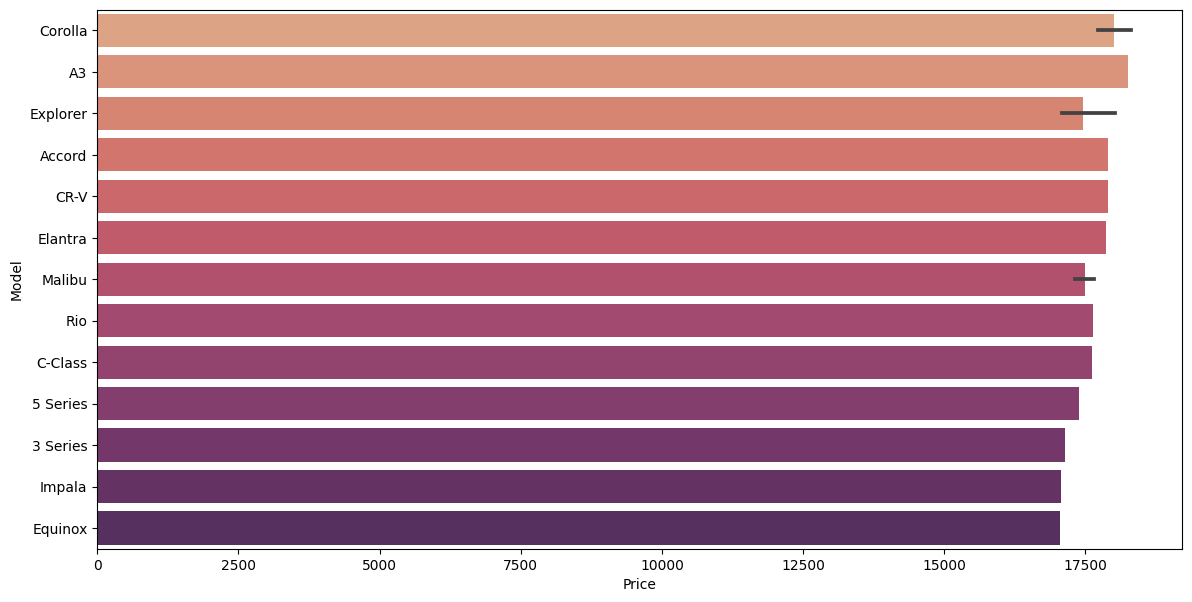

In [17]:
plt.figure(figsize=(14,7))
sns.barplot(y = "Model",x= "Price",data = highest_cars,palette = "flare")
plt.title("")
plt.show()

<a id = '6'></a>
## Statistical 

### Control of Corelation 

In [18]:
corr_df = df[["Year","Engine_Size","Mileage","Doors","Owner_Count","Price"]].corr()

In [19]:
corr_df

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
Year,1.000000,-0.001306,-0.002476,0.014867,0.000116,0.663036
Engine_Size,-0.001306,1.000000,0.015135,-0.009844,0.007122,0.357403
Mileage,-0.002476,0.015135,1.000000,0.007879,0.006287,-0.551227
Doors,0.014867,-0.009844,0.007879,1.000000,-0.005431,0.000511
Owner_Count,0.000116,0.007122,0.006287,-0.005431,1.000000,0.002656
Price,0.663036,0.357403,-0.551227,0.000511,0.002656,1.000000


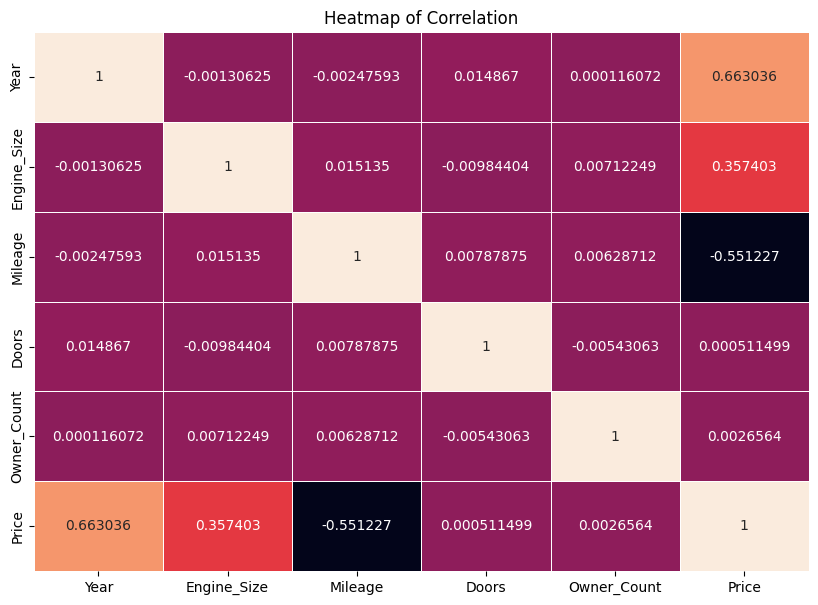

In [20]:
plt.figure(figsize= (10,7))
sns.heatmap(corr_df,annot = True,fmt ="g", linewidths=.5, cbar=False)
plt.title("Heatmap of Correlation")
plt.show()


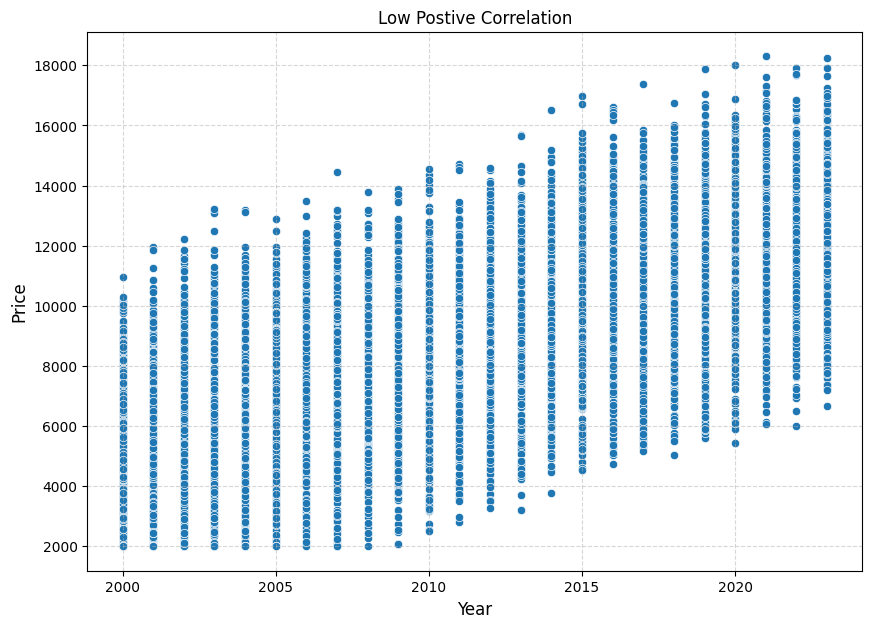

In [21]:
plt.figure(figsize=(10,7))
plt.title("Low Postive Correlation")
sns.scatterplot(data = df, x = "Year", y = "Price")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.grid(True,linestyle = "--",alpha = 0.5)
plt.show()

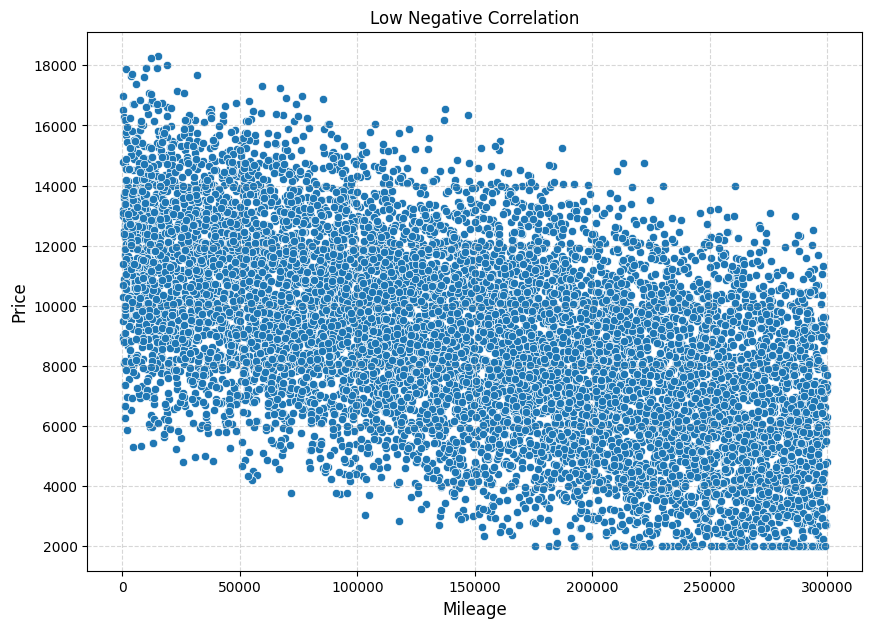

In [22]:
plt.figure(figsize=(10,7))
plt.title("Low Negative Correlation")
sns.scatterplot(data = df, x = "Mileage", y = "Price")
plt.xlabel("Mileage", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.grid(True,linestyle = "--",alpha = 0.5)
plt.show()

* There is a low positive correlation (0.663036) between Year and Price, meaning that as the year of the car increases, the price also tends to increase.

* There is a low positive correlation (0.357403) between Engine Size and Price. As the engine size increases, the price generally rises. However, the correlation is not very strong, meaning that engine size alone may not be a highly decisive factor in determining price.

* There is a low negative correlation (-0.551227) between Mileage and Price, indicating that as mileage increases, the price decreases.

* There is almost no correlation (0.000511) between Doors and Price. The lack of a strong relationship between the number of doors and price is an expected result.

* There is almost no correlation (0.002656) between Owner Count and Price. The fact that the number of previous owners does not have a significant impact on the price is an unexpected result. Generally, vehicles that have changed hands multiple times tend to have slightly lower prices due to uncertainties in their history.

<a id ="7"></a>
## Variable Conversion

In [23]:
df.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


In [24]:
df["Brand"].value_counts()

Brand
Ford          1048
Audi          1038
Volkswagen    1020
Honda         1009
Chevrolet     1003
BMW            999
Hyundai        995
Kia            976
Toyota         970
Mercedes       942
Name: count, dtype: int64

In [25]:
df["Model"].value_counts()

Model
Accord      365
Fiesta      363
Impala      355
5 Series    353
Tiguan      352
Focus       351
Q5          350
A4          350
Elantra     347
Golf        339
A3          338
Optima      336
Civic       336
3 Series    335
Explorer    334
Malibu      333
Tucson      329
Passat      329
Rio         327
Corolla     325
RAV4        324
Camry       321
E-Class     321
Sonata      319
Equinox     315
GLA         315
Sportage    313
X5          311
CR-V        308
C-Class     306
Name: count, dtype: int64

In [26]:


anova_result = stats.f_oneway(*(df[df["Model"] == model]["Price"] for model in df["Model"].unique()))
print("P-value of ANOVA Test between Model and Price:", anova_result.pvalue)


P-value of ANOVA Test between Model and Price: 0.8177865225247964


In [27]:
df_one_hot = pd.get_dummies(data = df , columns = ["Fuel_Type", "Transmission"], prefix = ["Fuel","Trans"],drop_first = True)
bool_columns = df_one_hot.select_dtypes(include = "bool").columns
df_one_hot[bool_columns] = df_one_hot[bool_columns].astype(int)
df_one_hot = df_one_hot.drop(columns = ["Brand","Model"]) 

In [28]:
df_one_hot[0:5]

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price,Fuel_Electric,Fuel_Hybrid,Fuel_Petrol,Trans_Manual,Trans_Semi-Automatic
0,2020,4.2,289944,3,5,8501,0,0,0,1,0
1,2012,2.0,5356,2,3,12092,0,1,0,0,0
2,2020,4.2,231440,4,2,11171,0,0,0,0,0
3,2023,2.0,160971,2,1,11780,1,0,0,1,0
4,2003,2.6,286618,3,3,2867,0,1,0,0,1


<a id="8"></a>
## Machine Learning

### Model Selection

* Dataset Size: (10000,10) - Medium Scale.
* Correlation Between Variables: Moderate.
* Linear Relationship: Our data exhibits a linear relationship.
* Independent Variables: More than one.
* Based on this situation, the most suitable machine learning model is Lasso Regression.

In [29]:
df_one_hot

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price,Fuel_Electric,Fuel_Hybrid,Fuel_Petrol,Trans_Manual,Trans_Semi-Automatic
0,2020,4.2,289944,3,5,8501,0,0,0,1,0
1,2012,2.0,5356,2,3,12092,0,1,0,0,0
2,2020,4.2,231440,4,2,11171,0,0,0,0,0
3,2023,2.0,160971,2,1,11780,1,0,0,1,0
4,2003,2.6,286618,3,3,2867,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,2004,3.7,5794,2,4,8884,0,0,0,0,1
9996,2002,1.4,168000,2,1,6240,1,0,0,0,0
9997,2010,3.0,86664,5,1,9866,0,0,1,0,0
9998,2002,1.4,225772,4,1,4084,0,1,0,0,0


In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df_one_hot.drop(columns=["Price"])
y = df_one_hot["Price"]

numeric_columns = ["Year", "Engine_Size", "Mileage", "Doors", "Owner_Count"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])  
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])  


X_train.head()
X_test.head()


,Year,Engine_Size,Mileage,Doors,Owner_Count,Fuel_Electric,Fuel_Hybrid,Fuel_Petrol,Trans_Manual,Trans_Semi-Automatic
6252,-0.945343,-1.558223,1.250267,1.346373,1.413416,0,0,0,1,0
4684,0.214520,-0.084019,-0.435145,1.346373,0.005719,0,1,0,0,0
1731,-0.075446,1.737057,-1.570342,1.346373,0.709567,0,1,0,0,0
4742,-0.655377,0.696442,-0.186808,0.446617,1.413416,0,0,0,1,0
4521,0.069537,-1.471505,-1.511017,-0.453140,1.413416,0,0,1,0,0


In [31]:
lasso = Lasso(alpha = 0.1).fit(X_train,y_train)

In [32]:
lasso.coef_

array([ 2.05867450e+03,  1.14417699e+03, -1.72171730e+03, -8.49147454e-01,
        2.46671980e-01,  1.98606517e+03,  9.88381159e+02, -6.79683232e-04,
       -1.48867650e+03, -1.49135816e+03])

In [33]:
lasso.get_params()

{'alpha': 0.1,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [34]:
lasso_cv_model = LassoCV(alphas = np.logspace(0,0.01,1000),
                  cv = 10,
                  max_iter = 10000)

In [35]:
lasso_cv_model.fit(X_train,y_train)

LassoCV(alphas=array([1.        , 1.00002305, 1.0000461 , 1.00006915, 1.0000922 ,
       1.00011525, 1.0001383 , 1.00016136, 1.00018441, 1.00020746,
       1.00023052, 1.00025357, 1.00027663, 1.00029968, 1.00032274,
       1.00034579, 1.00036885, 1.00039191, 1.00041497, 1.00043803,
       1.00046108, 1.00048414, 1.0005072 , 1.00053027, 1.00055333,
       1.00057639, 1.00059945, 1.00062251, 1.00064558, 1.00066864,
       1.00069171...
       1.02249139, 1.02251496, 1.02253853, 1.02256209, 1.02258566,
       1.02260923, 1.0226328 , 1.02265637, 1.02267995, 1.02270352,
       1.02272709, 1.02275066, 1.02277424, 1.02279781, 1.02282139,
       1.02284496, 1.02286854, 1.02289211, 1.02291569, 1.02293927,
       1.02296284, 1.02298642, 1.02301   , 1.02303358, 1.02305716,
       1.02308074, 1.02310432, 1.02312791, 1.02315149, 1.02317507,
       1.02319865, 1.02322224, 1.02324582, 1.02326941, 1.02329299]),
        cv=10, max_iter=10000)

In [36]:
lasso_cv_model.alpha_

1.0

In [37]:
lasso_tuned = Lasso(alpha = 1 ).fit(X_train ,y_train)

In [38]:
y_pred = lasso_tuned.predict(X_train)
X_train_error =  np.sqrt(mean_squared_error(y_train,y_pred))

In [39]:
y_pred = lasso_tuned.predict(X_test)
X_test_error = np.sqrt(mean_squared_error(y_test,y_pred))

In [40]:
print(f"Train error : {X_train_error}")
print(f"Test error : {X_test_error}")

Train error : 90.47551840099104
Test error : 65.07636339526788


There is not a high error difference between train and test, indicating that the model is not overfitting

In [41]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [42]:
print(f'MAE: {mae}, RMSE: {rmse}, R2 Score: {r2}')

MAE: 22.261237403076063, RMSE: 65.07636339526788, R2 Score: 0.9995390705488442
